<a href="https://colab.research.google.com/github/WOLFOX1717/WOLFOX1717/blob/main/Correlaci%C3%B3n%20lineal%20con%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install pingouin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


In [5]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y análisis
# ==============================================================================
import statsmodels.api as sm
from scipy import stats
from scipy.stats import pearsonr

# Configuración matplotlib
# ==============================================================================
plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [6]:
url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)

# Se utilizan únicamente información de individuos mayores de 18 años.
datos = datos[datos.age > 18]

datos.info()


<class 'pandas.core.frame.DataFrame'>
Index: 346 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  346 non-null    float64
 1   weight  346 non-null    float64
 2   age     346 non-null    float64
 3   male    346 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 13.5 KB


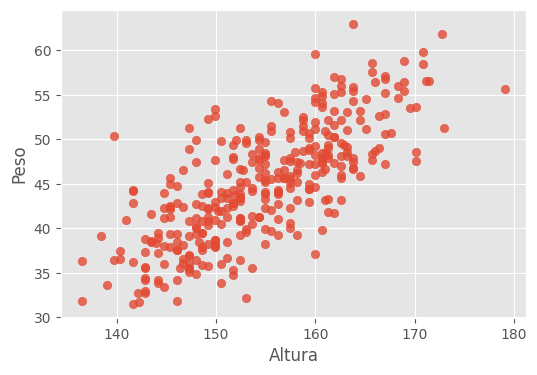

In [7]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.height, y=datos.weight, alpha= 0.8)
ax.set_xlabel('Altura')
ax.set_ylabel('Peso');

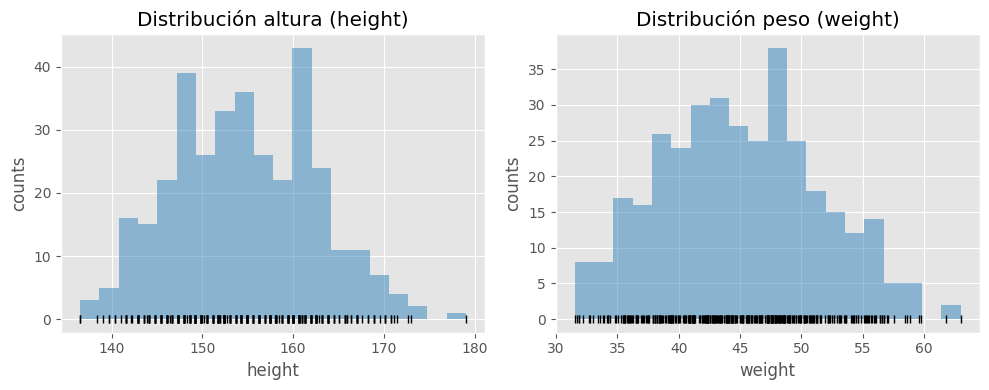

In [8]:
# Gráfico distribución variables
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axs[0].hist(x=datos.height, bins=20, color="#3182bd", alpha=0.5)
axs[0].plot(datos.height, np.full_like(datos.height, -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución altura (height)')
axs[0].set_xlabel('height')
axs[0].set_ylabel('counts')

axs[1].hist(x=datos.weight, bins=20, color="#3182bd", alpha=0.5)
axs[1].plot(datos.weight, np.full_like(datos.weight, -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución peso (weight)')
axs[1].set_xlabel('weight')
axs[1].set_ylabel('counts')


plt.tight_layout();

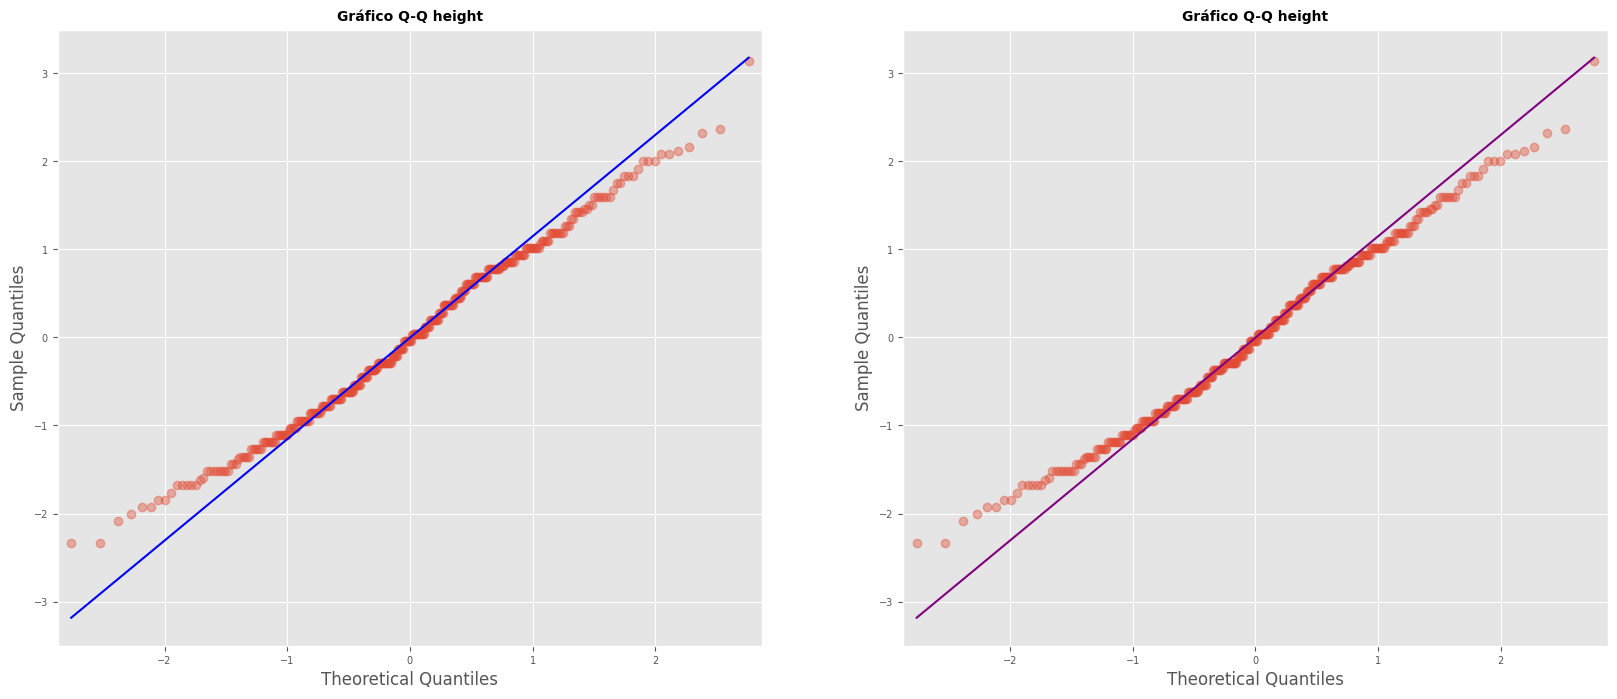

In [38]:
# Gráfico Q-Q
# ==============================================================================
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

sm.qqplot(
    datos.height,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[0],

)
for line in axs[0].get_lines():
    line.set_color('blue') #cambia de color la linea

axs[0].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[0].tick_params(labelsize = 7)

sm.qqplot(
    datos.height,
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = axs[1]
)
for line in axs[1].get_lines():
    line.set_color('purple')
axs[1].set_title('Gráfico Q-Q height', fontsize = 10, fontweight = "bold")
axs[1].tick_params(labelsize = 7)

In [39]:
# Normalidad de los residuos Shapiro-Wilk test
# ==============================================================================
shapiro_test = stats.shapiro(datos.height)
print(f"Variable height: {shapiro_test}")
shapiro_test = stats.shapiro(datos.weight)
print(f"Variable weight: {shapiro_test}")

Variable height: ShapiroResult(statistic=0.9910705950686569, pvalue=0.03441321698749473)
Variable weight: ShapiroResult(statistic=0.9911816371339782, pvalue=0.03672828843354881)


In [40]:
# Normalidad de los residuos D'Agostino's K-squared test
# ==============================================================================
k2, p_value = stats.normaltest(datos.height)
print(f"Variable height: Estadítico = {k2}, p-value = {p_value}")
k2, p_value = stats.normaltest(datos.weight)
print(f"Variable weight: Estadítico = {k2}, p-value = {p_value}")

Variable height: Estadítico = 7.210790495766356, p-value = 0.02717670115638557
Variable weight: Estadítico = 8.402628478646044, p-value = 0.014975881988444985
